# Imports and Functions

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def norm(x):
    x = np.array(x)
    return x/np.max(x)

problem here right now is that the count data is not in fact lining up with the cos^2 distribution at all, but it is mostly with the first data point.

# Data Collection

In [ ]:
# [0,pi/2)
Rangles = np.deg2rad([0,10,20,30,35,50,65,85])
Rcounts = [53,51,46,35,32,21,7,3]

In [36]:
# (-pi/2,0)
Langles = np.deg2rad([-85,-65,-50,-35,-20,-10])
Lcounts = [3,8,18,34,44,50]

In [37]:
# Combined Data
angles = np.concat((Langles,Rangles))
ncounts = norm(np.concat((Lcounts,Rcounts)))
ncounts_err = np.sqrt(np.concat((Lcounts,Rcounts)))/np.max(np.concat((Lcounts,Rcounts)))

counts = np.concat((Lcounts,Rcounts))
counts_err = np.sqrt(np.concat((Lcounts,Rcounts)))


# Plotting

In [38]:
def func(x,a):
    return a * np.cos(x)**2

In [39]:
popt, pcov = curve_fit(func,angles,counts)

In [40]:
popt

array([50.68964645])

In [41]:
# cos**2 distribution
x = np.linspace(-np.pi/2,np.pi/2,20)
cy = popt[0]*np.cos(x)**2

In [ ]:
#make a normed counts vs cos to see how well it fits to the distribution
#the scale different below might be from the distance between the plates

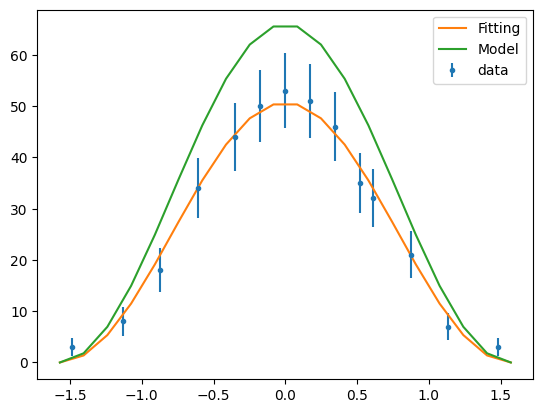

In [43]:
plt.figure()
plt.errorbar(angles,counts,counts_err,linestyle="",marker=".",label="data")
plt.plot(x,cy,label="Fitting")
plt.plot(x,66*np.cos(x)**2,label="Model")
plt.legend()
plt.show()